<div dir="rtl" style="text-align: right;">

# تحلیل داده به روش PCA

### هدف: تشخیص اینکه کدام ارقام دست‌نویس با استفاده از روش PCA بیشتر از بقیه متمایز هستند.  
فرض کنید در حال کار روی یک سرویس تشخیص تصویر برای یک شرکت پستی هستید. این سرویس قصد دارد تا ارقام دست‌نویس را به صورت خودکار تشخیص دهد. (این روش در حال توسط خدمات پستی مدرن مورد استفاده قرار گرفته و حتی از دقت بیشتری نسبت به انسان برخوردار است).  
شرکت پستی می‌خواهد بداند کدام ارقام دست‌نویس سختر قابل تشخیص هستند (نسبت به یکدیگر) تا بتواند روی جمع‌آوری نمونه‌های بیشتری از آن داده‌ها تمرکز کند.  
شما یک دیتاست از ارقام دست‌نویس در اختیار خواهید داشت و باید با استفاده از روش PCA مولفه های اصلی آنها را جدا کرده و تشخیص دهید که کدام ارقام به راحتی از بقیه قابل تمایز هستند.

</div>


<div dir="rtl" style="text-align: right;">

#### کتابخانه هایی که شاید نیاز به استفاده از آنها داشته باشید:

</div>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<div dir="rtl" style="text-align: right;">

#### در خانه پایین, اطلاعات موجود در فایل digits.csv را به صورت یک dataframe لود کنید و ستون ها اضافی از آن (ستون number_lable) را حذف کنید و آن را نمایش دهید (نمونه خروجی در زیر آمده)

</div>

In [1]:
import pandas as pd

df = pd.read_csv('digits.csv')

print(df)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0      

In [ ]:
import pandas as pd

df = pd.read_csv('digits.csv')

df = df.drop(columns=['number_label'])

print(df)


      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

<div dir="rtl" style="text-align: right;">

#### یکی از تصاویر موجود در فایل (که به صورت یک بردار در فایل موجود است) را انتخاب کرده و آن را با استفاده از کتابخانه های پایتونی که در بالا هست نمایش دهید (خروجی شما باید چیزی شبیه به عکس های زیر باشد)

</div>

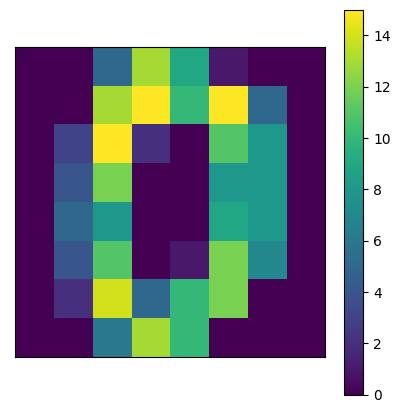

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digits.csv')

zero_digit = df[df['number_label'] == 0].iloc[0]

image_data = zero_digit.drop('number_label').values.reshape(8, 8)

fig, ax = plt.subplots(figsize=(5,5))
cax = ax.matshow(image_data, cmap='viridis')  

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(cax)
plt.show()

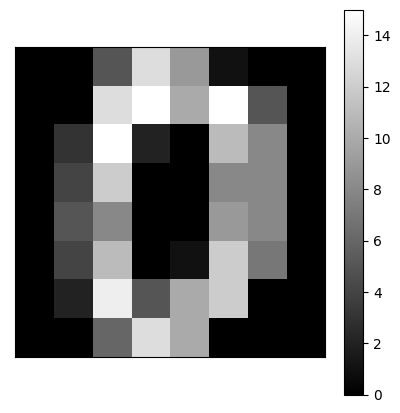

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digits.csv')

zero_digit = df[df['number_label'] == 0].iloc[0]

image_data = zero_digit.drop('number_label').values.reshape(8, 8)

fig, ax = plt.subplots(figsize=(5,5))
cax = ax.matshow(image_data, cmap='gray')  

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(cax)
plt.show()

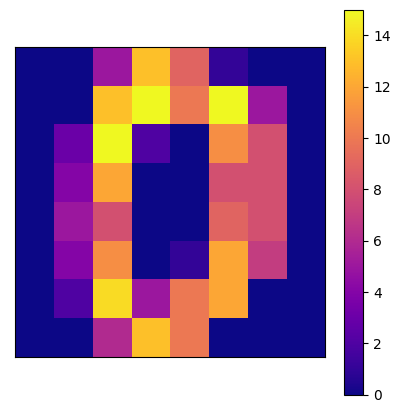

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digits.csv')

zero_digit = df[df['number_label'] == 0].iloc[0]

image_data = zero_digit.drop('number_label').values.reshape(8, 8)

fig, ax = plt.subplots(figsize=(5,5))
cax = ax.matshow(image_data, cmap='plasma')  

ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(cax)
plt.show()


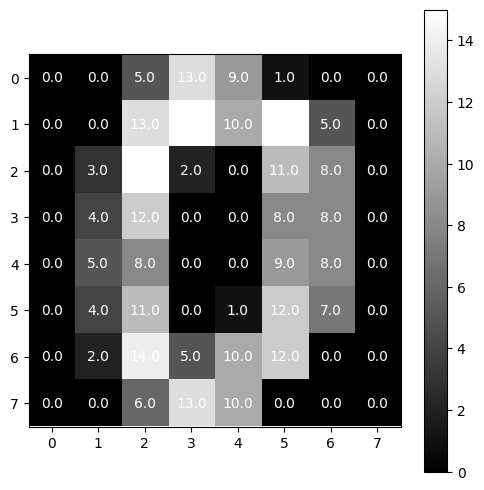

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('digits.csv')

first_zero_row = df[df['number_label'] == 0].iloc[0]

pixel_values = first_zero_row.drop('number_label').values

image_size = int(np.sqrt(len(pixel_values)))  
image_data = pixel_values.reshape((image_size, image_size))

plt.figure(figsize=(6, 6))
plt.imshow(image_data, cmap='gray', origin='upper')

for i in range(image_size):  
    for j in range(image_size): 
        plt.text(j, i, f'{image_data[i, j]:.1f}', ha='center', va='center', color='white')

plt.colorbar()
plt.show()




<div dir="rtl" style="text-align: right;">

####  در مرحله اول, برای بدست آوردن نتایج درست باید اطلاعات را اسکیل کنید (برای اینکه مقادیر بزرگ تر باعث Bias شدن نتایج نشود, اطلاعات بیشتر در این زمینه را میتوانید در این لینک پیدا کنید https://shorturl.at/0V1vR) در سلول پایین اطلاعات را اسکیل کرده و آنها را نمایش دهید (به صورت آرایه)

</div>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

df = pd.read_csv('digits.csv')

labels = df['number_label']

data = df.drop(columns=['number_label'])

def standardize_data(data, epsilon=1e-8):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    return (data - mean) / (std_dev + epsilon)

def compute_covariance(data):
    n_samples = data.shape[0]
    return (data.T @ data) / (n_samples - 1)

standardized_data = standardize_data(data)

print(standardized_data)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0  -0.335016  -0.043081   0.274072  -0.664478  -0.844129   
1           0.0  -0.335016  -1.094937   0.038648   0.268751  -0.138020   
2           0.0  -0.335016  -1.094937  -1.844742   0.735365   1.097673   
3           0.0  -0.335016   0.377661   0.744919   0.268751  -0.844129   
4           0.0  -0.335016  -1.094937  -2.551014  -0.197863  -1.020657   
...         ...        ...        ...        ...        ...        ...   
1792        0.0  -0.335016  -0.253452  -0.432200   0.268751   0.038508   
1793        0.0  -0.335016   0.167290   0.980343   0.268751   0.921145   
1794        0.0  -0.335016  -0.884566  -0.196776   0.735365  -0.844129   
1795        0.0  -0.335016  -0.674195  -0.432200  -1.131092  -1.020657   
1796        0.0  -0.335016   1.008775   0.509495  -0.897785  -0.844129   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0     -0.409724  -0.125023  -0.0

<div dir="rtl" style="text-align: right;">

####  در این بخش شما باید با استفاده از PCA دو مولفه اصلی را پیدا کرده, مختصات پیکسل ها را بر این اساس (به صورت آرایه) چاپ کنید و نمودار پراکندگی اعداد (مشابه عکس پایین) را رسم کنید و با توجه به نتایج بدست آمده در یک Markdown تحلیل خود را از اینکه تشخیص کدام اعداد از یکدیگر سخت تر است بیان کنید


</div>

In [71]:
cov_matrix = compute_covariance(standardized_data)

def qr_algorithm(A, max_iterations=3000, tol=1e-11):
    n = A.shape[0]
    Q_total = np.eye(n)
    for _ in range(max_iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        Q_total = Q_total @ Q
        if np.allclose(A - np.diag(np.diagonal(A)), 0, atol=tol):
            break
    eigenvalues = np.diagonal(A)
    eigenvectors = Q_total
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = qr_algorithm(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]  
top_2_eigenvectors = eigenvectors[:, idx[:2]]

projected_data = np.dot(standardized_data, top_2_eigenvectors)

print(projected_data)

[[-1.91421365  0.95450159]
 [-0.58898033 -0.92463584]
 [-1.30203906  0.31718879]
 ...
 [-1.022596    0.14791085]
 [-1.07605521  0.38090626]
 [ 1.25770233  2.22759088]]


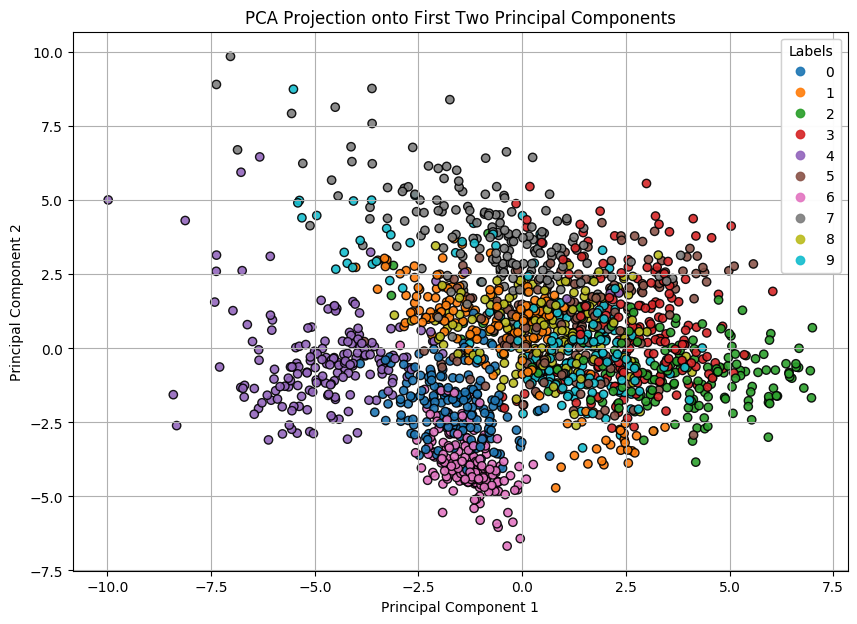

In [74]:

plt.figure(figsize=(10, 7))
scatter = plt.scatter(projected_data[:, 0], -projected_data[:, 1], c=labels, cmap='tab10', alpha=0.9, edgecolors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection onto First Two Principal Components')
plt.grid(True)

legend = plt.legend(*scatter.legend_elements(), title="Labels")
plt.gca().add_artist(legend)

plt.show()




<div dir="rtl" style="text-align: right;">

####  تحیل خود را از اطلاعات بالا اینجا وارد کنید

</div>

Digit 4 is more distinguishable than other digits as the features of other digits are so correlated with each other that we cannot classify them easily. Imagine we have the point (2.5,0), it is not vivid whether it is for digit 9 or 3 or etc. 

<div dir="rtl" style="text-align: right;">

####  در مرحله آخر, مشابه مرحله قبل سه مولفه اصلی PCA را پیدا کنید و نمودار پراکندگی 3 بعدی اعداد (مشابه عکس پایین) پیدا کرده و تحلیل خود را بیان کنید (اگر نمودار به صورت interactive باشد نمره امتیازی دارد!)

</div>

In [ ]:

cov_matrix = compute_covariance(standardized_data)

def qr_algorithm(A, max_iterations=3000, tol=1e-11):
    n = A.shape[0]
    Q_total = np.eye(n)
    for _ in range(max_iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        Q_total = Q_total @ Q
        if np.allclose(A - np.diag(np.diagonal(A)), 0, atol=tol):
            break
    eigenvalues = np.diagonal(A)
    eigenvectors = Q_total
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = qr_algorithm(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]  
top_3_eigenvectors = eigenvectors[:, idx[:3]]


projected_data = (standardized_data @ top_3_eigenvectors)  


print(projected_data)
projected_data = np.dot(standardized_data, top_3_eigenvectors)

             0         1         2
0    -1.914214  0.954502 -3.946035
1    -0.588980 -0.924636  3.924755
2    -1.302039  0.317189  3.023333
3     3.020770  0.868772 -0.801744
4    -4.528949  1.093480  0.973121
...        ...       ...       ...
1792 -0.104331 -0.255024 -3.765861
1793 -2.423234  1.429611 -3.045245
1794 -1.022596  0.147911  2.469974
1795 -1.076055  0.380906 -2.455487
1796  1.257702  2.227591  0.283628

[1797 rows x 3 columns]


In [ ]:

projected_df = pd.DataFrame(projected_data, columns=['PC1', 'PC2', 'PC3'])
projected_df['Label'] = labels.values

fig = px.scatter_3d(
    projected_df, x='PC1', y='PC2', z='PC3', 
    color=projected_df['Label'].astype(str),  
    color_discrete_sequence=px.colors.qualitative.Bold, 
    title='3D PCA Visualization of Handwritten Digits'
)

fig.update_traces(marker=dict(size=6, opacity=0.9, line=dict(width=0.5, color='black')))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))

fig.show()



Here, we see that the features of digits 8, 5, 9, and 3 are so entagled with each other and therefor it makes it hard to recognize these digits. In contrast, digits 0, 1, 4, 2, 6, and 7 are more seperable and distiguishable.